In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension (h/t rabernat)
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

In [3]:
la=xr.open_dataset('mask_grnlnd_antarc.nc').landarea
cf=365*24*60*60

In [4]:
dsets={m:xr.open_dataset('../postp/{}.globann.nc'.format(m)) for m in ['cesm1','cesm2']}

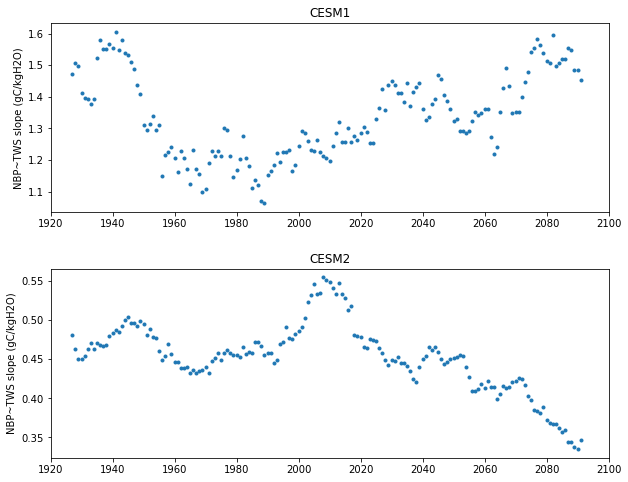

In [5]:
yys=np.arange(1920,2085)
slopes={m:[] for m in dsets}
for m in dsets:
    ds=dsets[m]
    for y1 in yys:
        t=slice(y1,y1+14)
        x=sm.add_constant(detrend_dim(ds.SW.sel(year=t),dim='year').values.ravel())
        y=detrend_dim(cf*ds.NBP.sel(year=t),dim='year').values.ravel()
        lm=sm.OLS(y,x).fit()
        slopes[m].append(lm.params[1])

plt.figure(figsize=[10,8])
for i,m in enumerate(dsets):
    plt.subplot(2,1,i+1)
    plt.plot(7+yys,slopes[m],'.')
    plt.xlim([1920,2100])
    plt.ylabel('NBP~TWS slope (gC/kgH2O)')
    plt.title(m.upper())

plt.subplots_adjust(hspace=0.3)

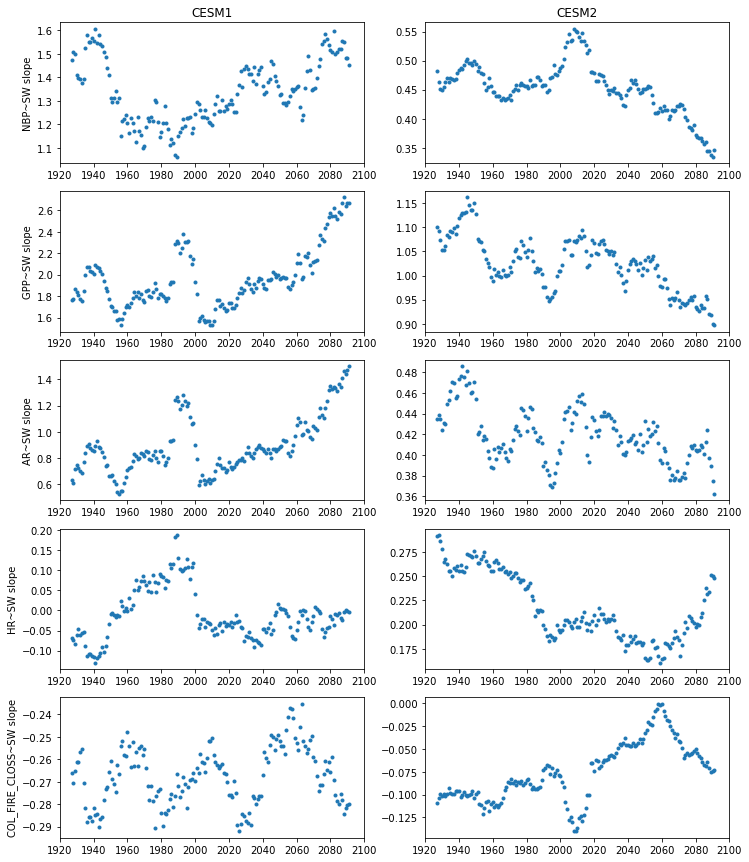

In [28]:
yys=np.arange(1920,2085)
i=0
plt.figure(figsize=[12,15])
for v in ['NBP','GPP','AR','HR','COL_FIRE_CLOSS']:
    for m in dsets:
        i+=1
        ds=dsets[m]
        slopes=[]
        for y1 in yys:
            t=slice(y1,y1+14)
            x=sm.add_constant(detrend_dim(ds.SW.sel(year=t),dim='year').values.ravel())
            y=detrend_dim(cf*ds[v].sel(year=t),dim='year').values.ravel()
            lm=sm.OLS(y,x).fit()
            slopes.append(lm.params[1])
            
        plt.subplot(5,2,i)
        plt.plot(7+yys,slopes,'.')
        plt.xlim([1920,2100])
        if i%2==1:
            plt.ylabel(v+'~SW slope')
        if i<3:
            plt.title(m.upper())
        



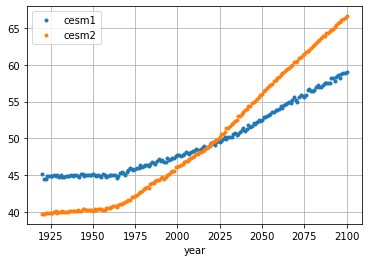

In [18]:
for m in dsets:
    (1e-9*la.sum()*24*60*60*365*dsets[m].NPP).mean(dim='ens').plot.line('.',label=m)
plt.legend()
plt.grid()

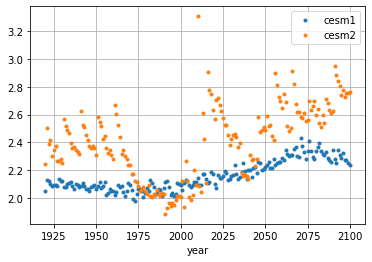

In [11]:
for m in dsets:
    (1e-9*la.sum()*24*60*60*365*dsets[m].COL_FIRE_CLOSS).mean(dim='ens').plot.line('.',label=m)
plt.legend()
plt.grid()

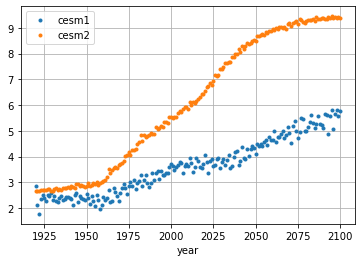

In [14]:
for m in dsets:
    (1e-9*la.sum()*24*60*60*365*dsets[m].NEP).mean(dim='ens').plot.line('.',label=m)
plt.legend()
plt.grid()

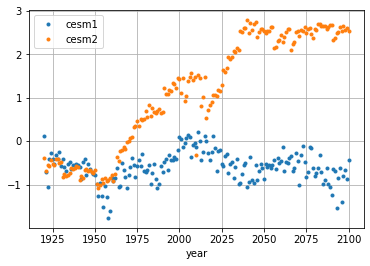

In [15]:
for m in dsets:
    (1e-9*la.sum()*24*60*60*365*dsets[m].NBP).mean(dim='ens').plot.line('.',label=m)
plt.legend()
plt.grid()

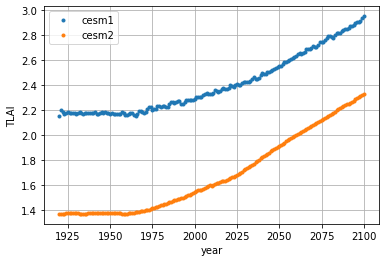

In [13]:
for m in dsets:
    (dsets[m].TLAI).mean(dim='ens').plot.line('.',label=m)
plt.legend()
plt.grid()

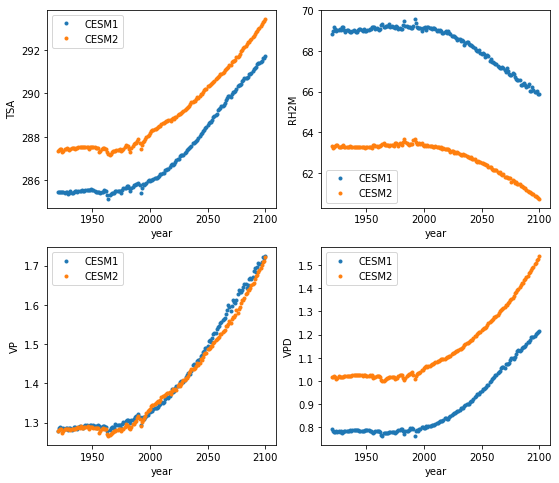

In [103]:
plt.figure(figsize=[9,8])
for i,v in enumerate(['TSA','RH2M','VP','VPD']):
    plt.subplot(2,2,i+1)
    for m in dsets:
        dsets[m][v].mean(dim='ens').plot.line('.',label=m.upper())
    plt.legend();
plt.savefig('cesm1_vs_cesm2_land.png',dpi=300,bbox_inches='tight')   

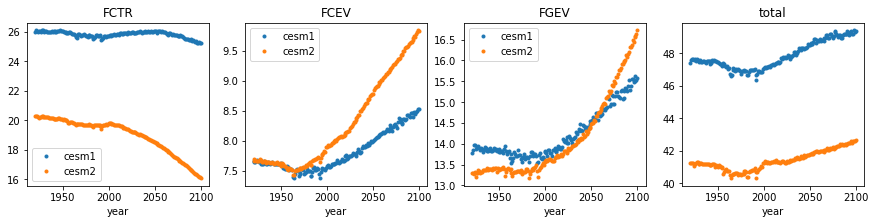

In [114]:
plt.figure(figsize=[15,3])
for i,v in enumerate(['FCTR','FCEV','FGEV']):
    plt.subplot(1,4,i+1)
    for m in dsets:
        dsets[m][v].mean(dim='ens').plot.line('.',label=m)
    plt.ylabel('')
    plt.legend();
    plt.title(v)
plt.subplot(1,4,4)
for m in dsets:
    (dsets[m]['FCTR']+dsets[m]['FCEV']+dsets[m]['FGEV']).mean(dim='ens').plot.line('.',label=m)
plt.title('total');

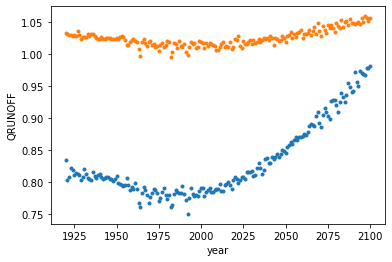

In [117]:
for m in dsets:
    (24*60*60*dsets[m]['QRUNOFF']).mean(dim='ens').plot.line('.',label=m)

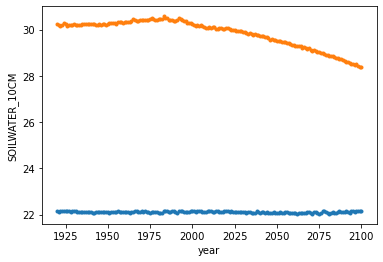

In [124]:
for m in dsets:
    (dsets[m]['SOILWATER_10CM']).mean(dim='ens').plot.line('.',label=m)

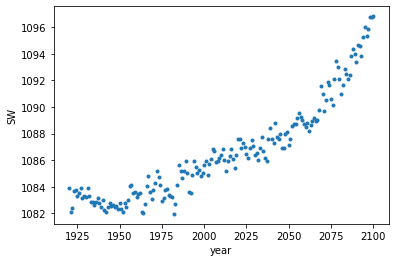

In [129]:
dsets['cesm1'].SW.mean(dim='ens').plot.line('.')

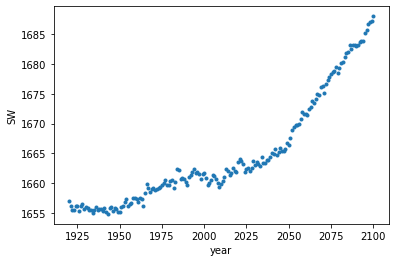

In [130]:
dsets['cesm2'].SW.mean(dim='ens').plot.line('.')